# GDP Assignment


Name: <B>Jallepalli Prerna </B>

Operating System:<B> Ubuntu </B>

Date: <B> 17/10/2019</B>

Time: <B> 23:00:00 </B>


<h3> Other related Instructions </h3>

-- All files are extracted from the same folder.
There is description of each step written after every code cell.

-- There are mainly <b> 3 Main DataFrames </b> for Data-1A, Data-1B and Data-2 with the following name <b>data_1A, data_1B, and data_2</b> respectively.

-- For solving rest of the questions mentioned in the assignment, created the dataframes based on top of these 3 main dataframes.

-- The Questions related to the Assignment are in the cell containing <b> Questions </b> as the heading.

<b>! Important: </b>

-- <b>As Ubuntu Operating System is used, please look over Partern Matching in case of Part-1B as file path is a 
lot different as compared to Windows OS </b>



### Importing the libraries

All the necessary libraries are imported, each library has a following commented line stating the using of the library in this assignment

In [1]:
import pandas as pd                   
# Pandas library helps in extracting the data from csv or excel files 
#into the dataframe and then further manipulating the data according to the necessary format

import numpy as np
# Numpy library helps in statistical calculation and also ploting the best fit line for each state in the assignment

import matplotlib.pyplot as plt
# Matplotlib is a visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

import seaborn as sns
# Seaborn is another visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

import glob   
# To extract all the files in a folder based on Pattern matching 

import math
# Math library is used to do some basic mathematical operations like square roots etc.

%matplotlib inline
# The above command is a magical command for ploting graphs in jupyter notebook

### To Install or Update Packages for running this assignment

!pip install -U seaborn

!pip install glob



### Data Extraction for all the Parts
3 Main Dataframes
Any further manipulation will be done using these 3 data frames

In [2]:
path = "/home/jallepalliprerna/Desktop/UPGRAD/GDP Assignment/csvFiles"
# Provide the "Path to the common folder" here

data_1A = pd.read_csv(path+"/ab40c054-5031-4376-b52e-9813e776f65e.csv")
# Data extraction for 1st part

all_files_path = glob.glob(path+"/NAD*.csv")

li = [] 
# Declaring an empty list so that all the dataframes can me stored in this list.

unin_terrs = ["Delhi", "Puducherry", "Chandigarh", "Andaman Nicobar Islands", "Daman Diu", "Dadar Nagar Haveli", "Lakshadweep"]

for filePath in all_files_path:
    
    fileName = filePath.split('/')[-1].split('-')[1].replace("_", " ")
    # Extract the fileName from the file path string by splitting at appropriate places
    
    try:
        df = pd.read_csv(str(filePath), encoding = 'utf-8')[["S.No.", "Item", "2014-15"]]


        df = df[~df["S.No."].str.contains("\.")]
        # Check for all the float types in the column "S.No." and remove the row corresponding to them

        df = df.drop('S.No.', axis=1).reset_index(drop=True)
        # drop the serial number (S.No.) column as it is not required for further processing

        # Transpose the data 
        df = df.T

        # Change the header of the dataframe
        new_header = df.iloc[0]
        df.columns = new_header
        df = df[1:]

        # Extract the State name from the filename in the path and store it
        df.loc[:, "States"] = fileName

        # Append the expracted data in to the existing list
        li.append(df)
        
    except:
        
        list_columns = ["Agriculture, forestry and fishing", "Mining and quarrying", "Primary", 
                       "Manufacturing", "Electricity, gas, water supply & other utility services",
                      "Construction", "Secondary", "Trade, repair, hotels and restaurants", 
                       "Transport, storage, communication & services related to broadcasting", 
                      "Financial services", "Real estate, ownership of dwelling & professional services",
                      "Public administration", "Other services", "Tertiary", "TOTAL GSVA at basic prices",
                      "Taxes on Products", "Subsidies on products", "Gross State Domestic Product", 
                      "Population ('00)", "Per Capita GSDP (Rs.)"]

        df = pd.read_csv(str(filePath), encoding = 'cp1252')[["Item", "2014-15"]]

        df = df.T

        new_header = df.iloc[0]
        df.columns = new_header
        df = df[1:]

        df = df[list_columns]

        df.loc[:, "States"] = fileName
        li.append(df)

'''
Summary of try and except:

The above code can encode two kinds of files, one with the file encoding of "utf-8" and if it fails to encode then
alternatively the code could be encoded in "cp1252".
In case of UTF-8 encoded files, the sub categories are filtered out based on the S.NO.
since for the "cp1252" encoded files, the sub categories were not able to get filtered out based on "S.NO." hence
stoed all the necessary columns needed in a list and picked up those columns from the dataset df.

'''


# Concatenate the all the data that we got into one single dataframe
data_1B_UT = pd.concat(li, axis=0, ignore_index=True, sort=False).set_index("States")
# The above dataframe contains data of union territories as well, which would be needed for Part-2 of the Assignment

data_1B = data_1B_UT.drop(list(set(list(data_1B_UT.index)).intersection(set(unin_terrs))))
# this is because we are not supossed to consider the union territories


columns = ["Sl. No.", "Level of Education - State", "Primary - 2012-2013", "Primary - 2013-2014", "Primary - 2014-2015",
          "Upper Primary - 2012-2013", "Upper Primary - 2013-2014", "Upper Primary - 2014-2015", "Secondary - 2012-2013", 
           "Secondary - 2013-2014", "Secondary - 2014-2015", "Senior Secondary - 2012-2013", "Senior Secondary - 2013-2014",
          "Senior Secondary - 2014-2015"
          ]
# Defining the column names for the dataframe

data_2 = pd.read_csv(path+"/rs_session243_au570_1.1.csv")
# Extracting the data from the csv file

data_2.columns = columns
# Resetting the column names because of discripency of the names in the file


# Part-I: GDP Analysis of the Indian States

For each of the following steps of analysis, choose an appropriate type of plot for comparing the data. Also, ensure that the plots are in increasing or decreasing order for better comparison. For example, if you make a bar plot to compare the GDPs of the states, ensure that the bars are in either increasing or decreasing order of GDP.

## Part I-A:

First, you need to load the data in Python properly and then clean it. This also involves the treatment of missing values, you can choose to drop the row or column as well. Remember this will affect your next analysis and results drastically.

### Data Extraction for Part-1

For Part-1, csv named "ab40c054-5031-4376-b52e-9813e776f65e.csv" will be loaded into the dataframe named <b> data_1A </b> using pandas.read_csv library 
Which is done above

In [3]:
data_1A.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


### Data Cleaning for Part-1

<b> Removing the unnecessary columns including the Union Territories as it is not supposed to be used in this assignment. </b>

We can further remove rows with maximum null values.
Removing the rows having the duration 2016-17 as those rows have maximum null values.

We can further remove "West Bengal1" column, We can even ignore the nan values as most of it will be taken care by python itself

-- data_1A = data_1A[data_1A['Duration'] != '2016-17'] -- 


In [4]:
union_terriories = ["Andaman & Nicobar Islands", "Chandigarh", "Puducherry", "Delhi"]
# storing all the 7 union teritories in a list

data_1A = data_1A.drop(union_terriories, axis =1).drop("West Bengal1", axis=1)
# drop all the values listed from dataframe using "drop" function along with axis=1 (denoting column wise operation)

data_1A.head()

############## Dataset preperation for Data 1A is done ##################

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0





## Task-1:

<B> Problem Statement: </B> Plot a graph for rows " % Growth over previous year" for all the states (not union territories) whose data is available, use as much data as possible for this exercise. Use the best fit line to represent the growth for each state. Draw a similar line graph for the nation as well.





### Dataset Prerperation for task

In [5]:
task_1_1A = data_1A[data_1A['Items  Description'] != 'GSDP - CURRENT PRICES (` in Crore)']
#  Dropping all the rows having "GSDP -Current prices" as "%Growth over previous years" needs to be plotted

task_1_1A = task_1_1A.drop(["Items  Description"], axis=1).set_index("Duration")
# after filtering required rows, drop the "Item Desciption" column and then set dataframe index to "Duration"

task_1_1A
# Printng out the dataframe

################### Dataset preperation for Data-1A Task 1: First Sub-Task is done #####################

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
Duration,,,,,,,,,,,,,,,,,,,,,
2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


### Plotting Best Fit line for each state

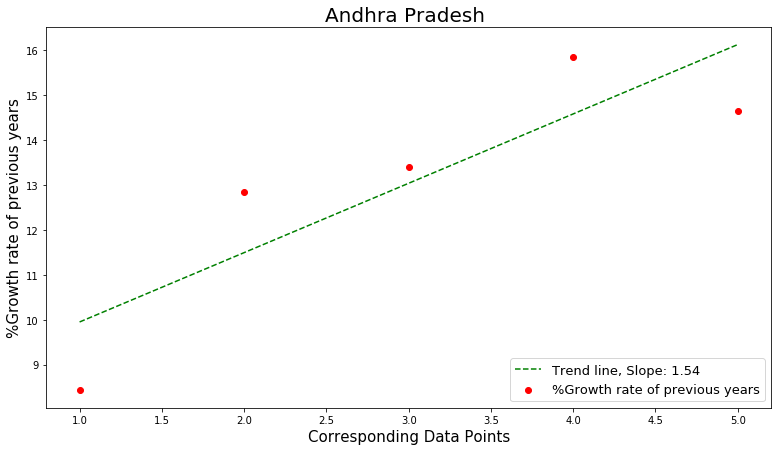

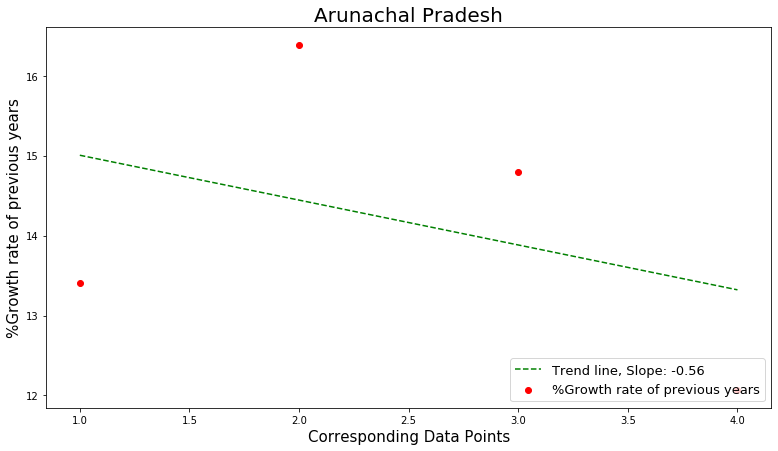

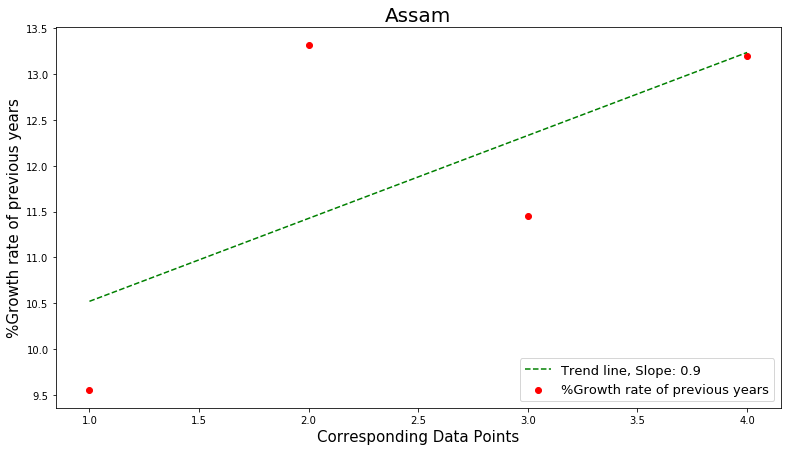

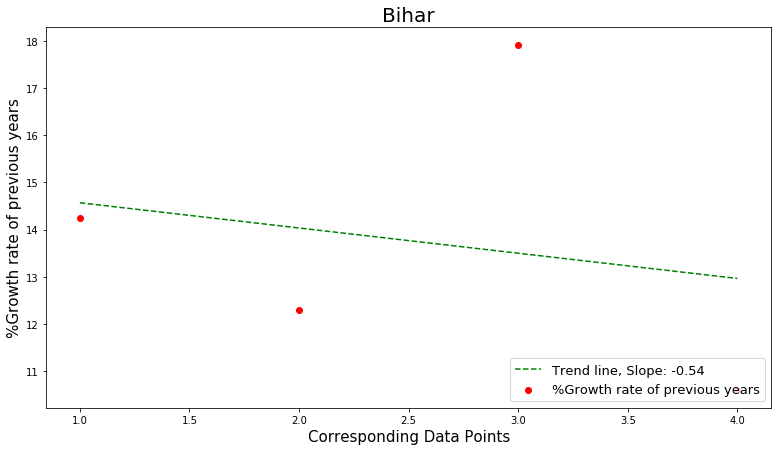

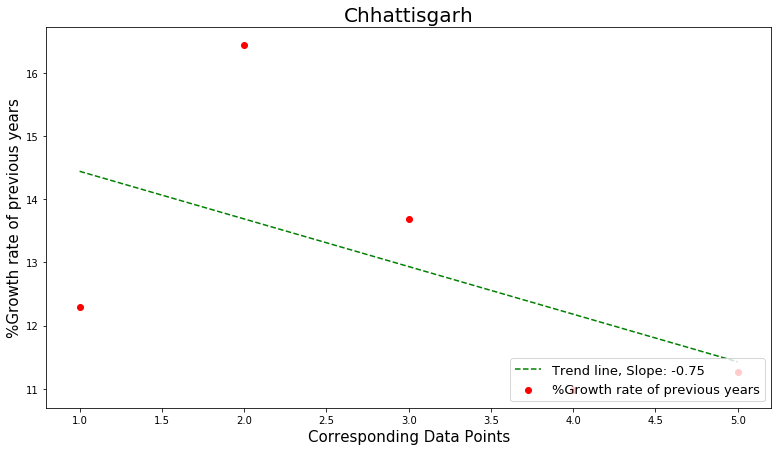

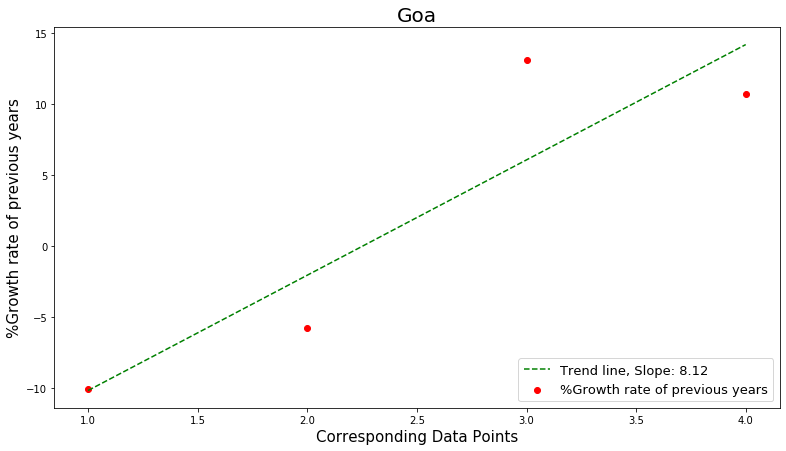

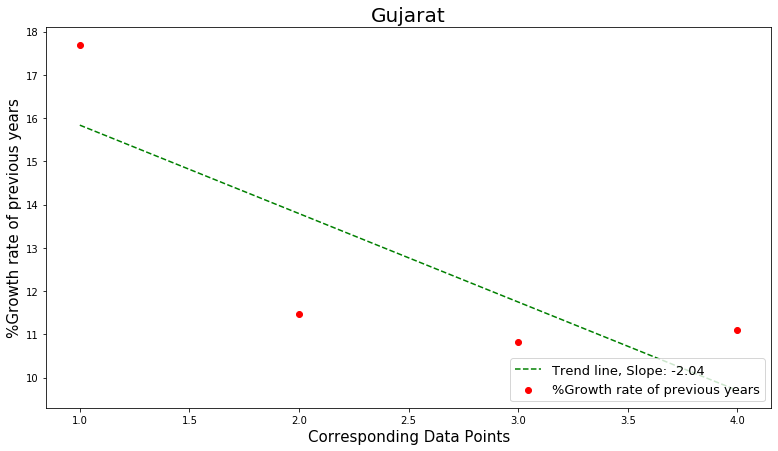

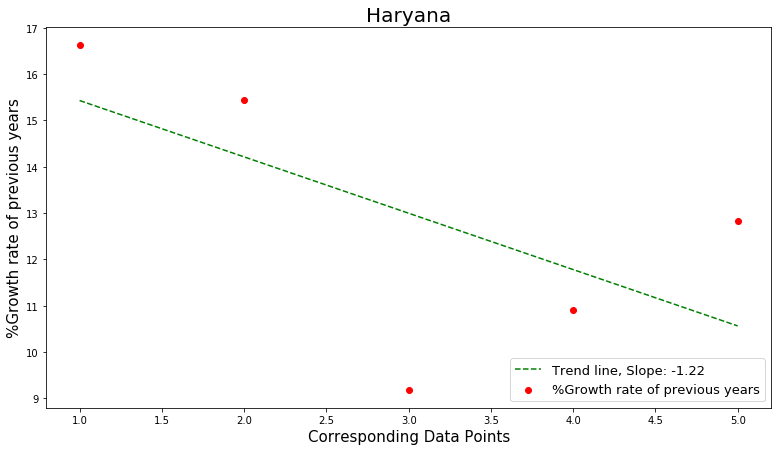

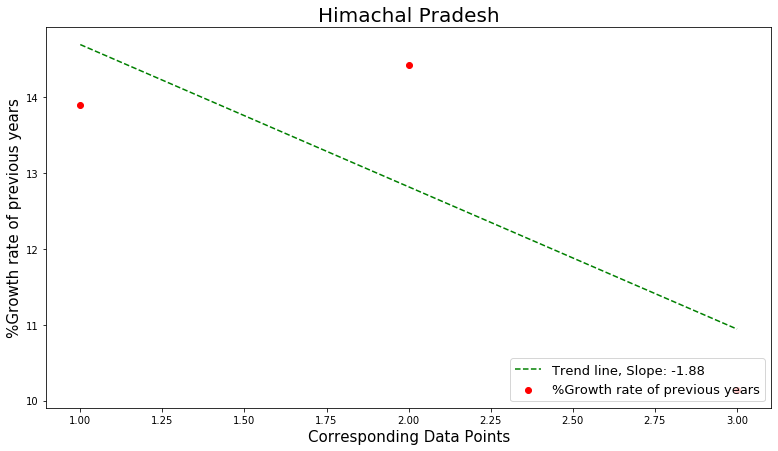

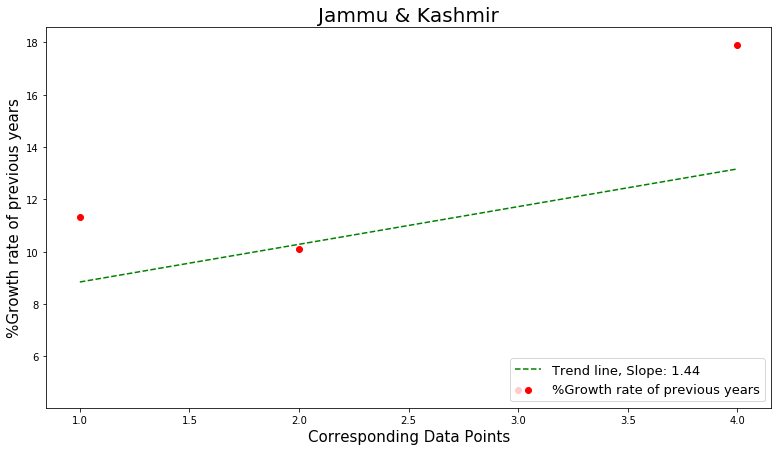

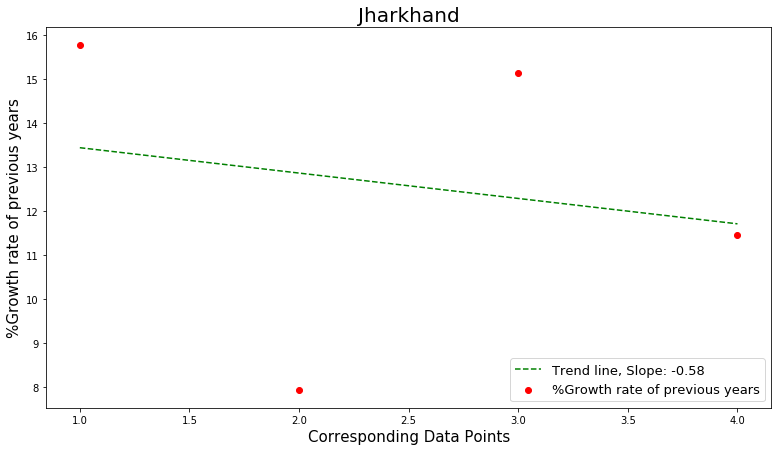

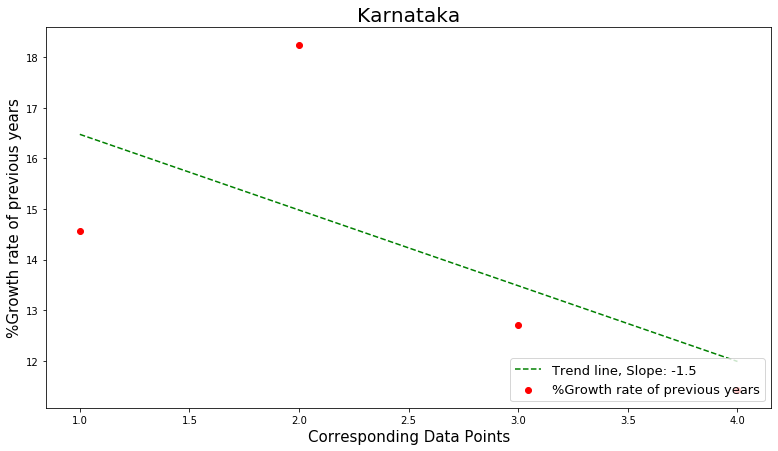

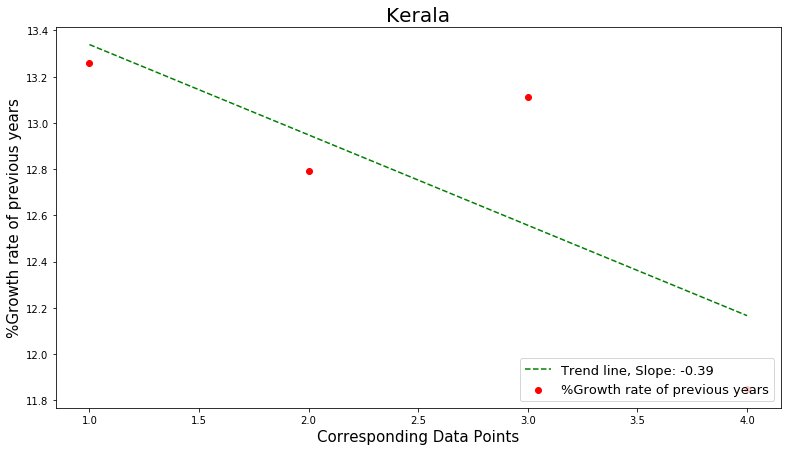

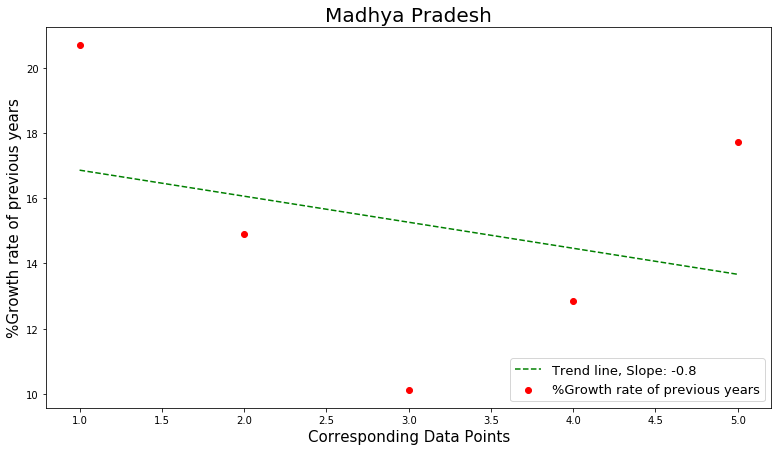

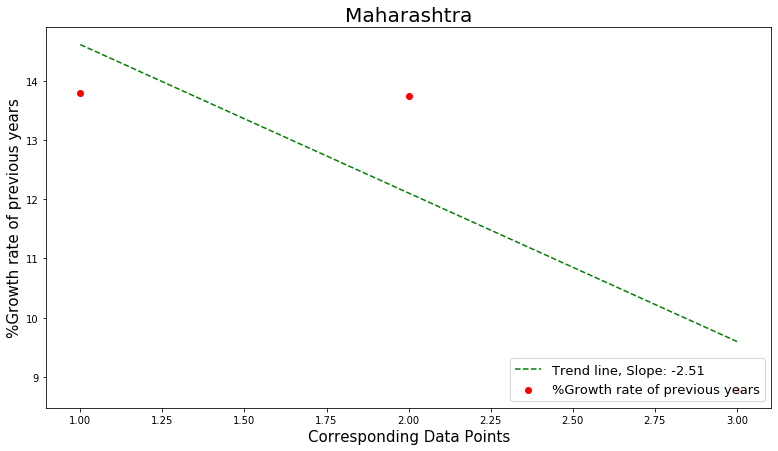

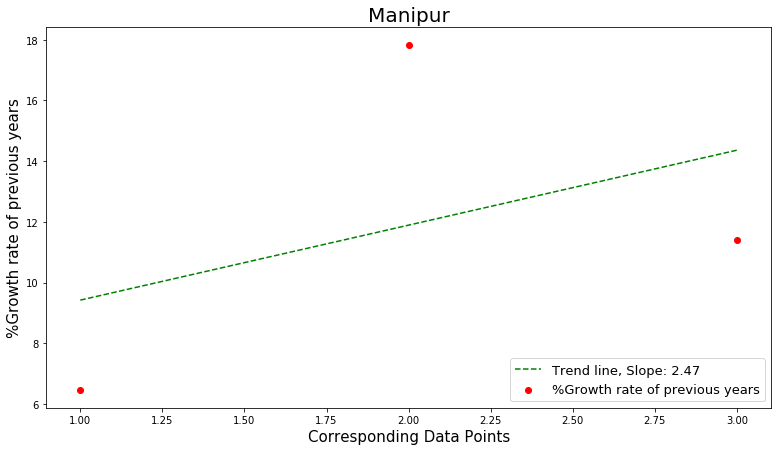

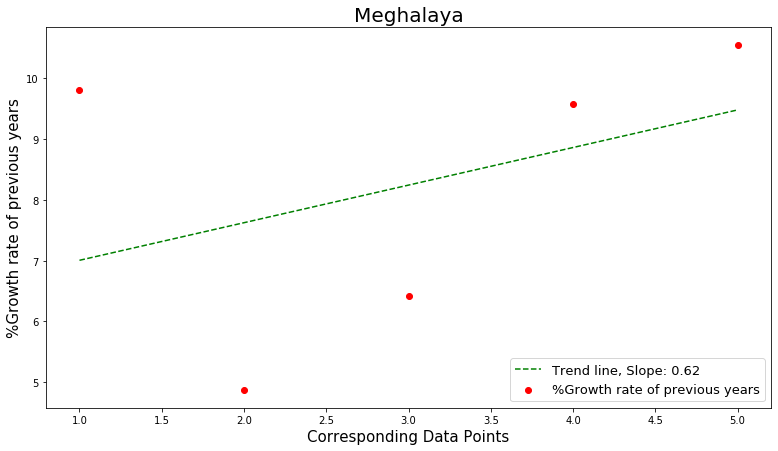

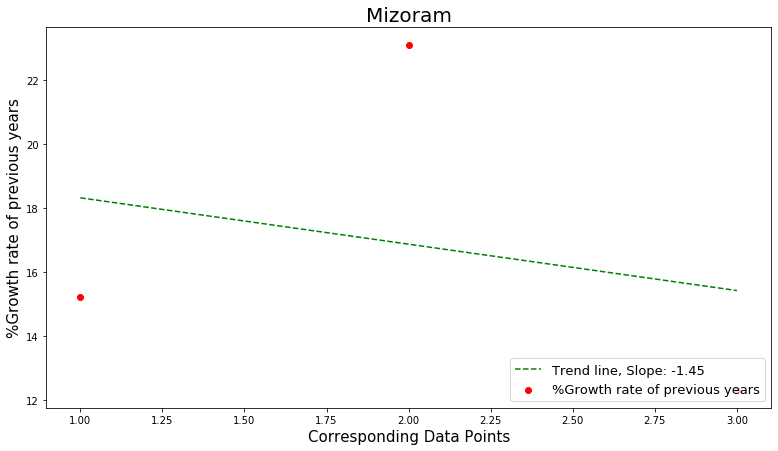

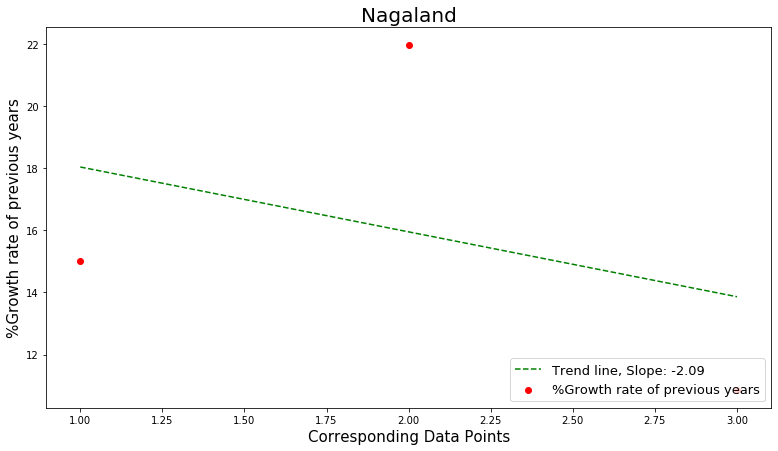

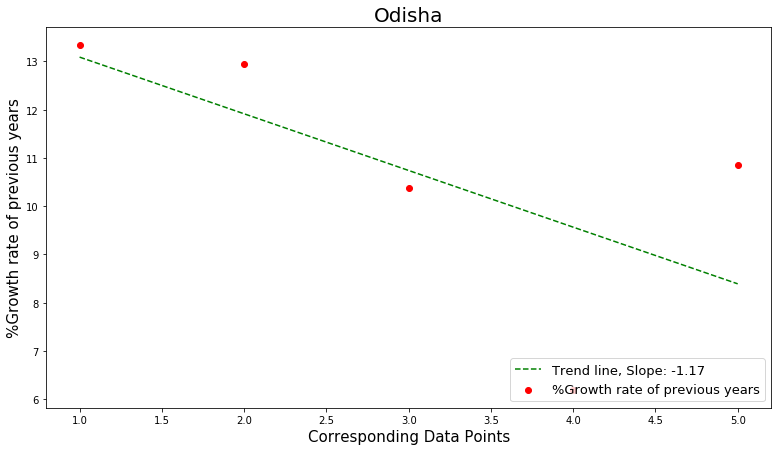

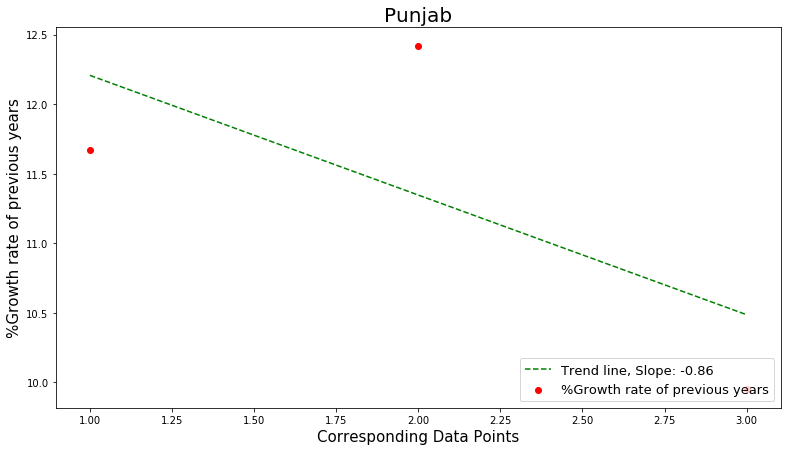

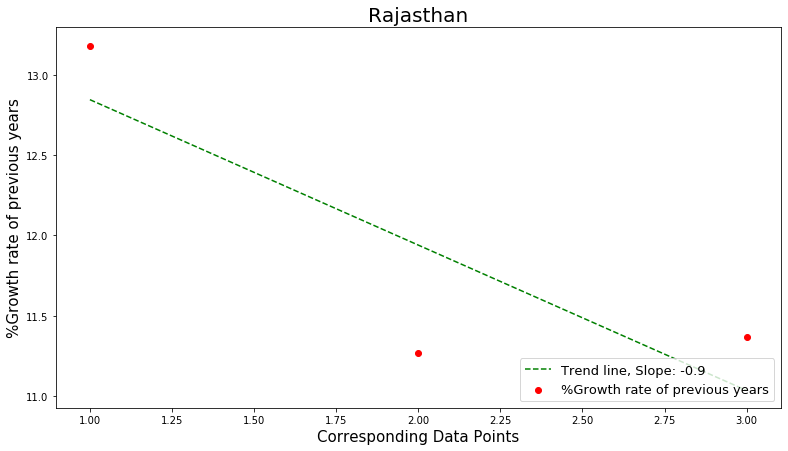

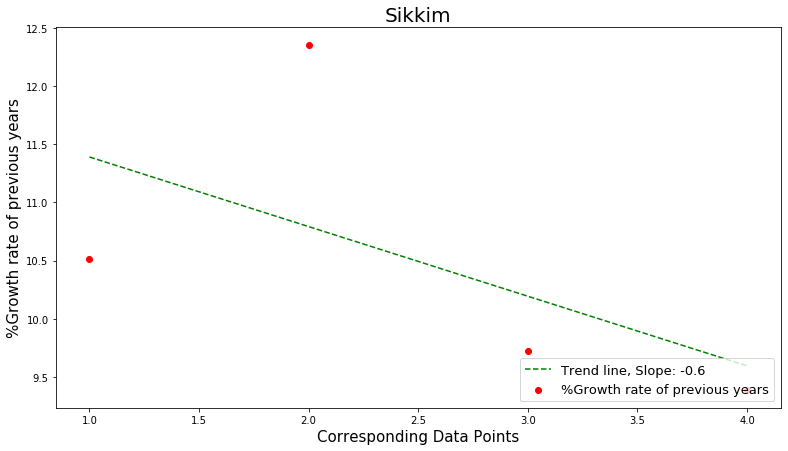

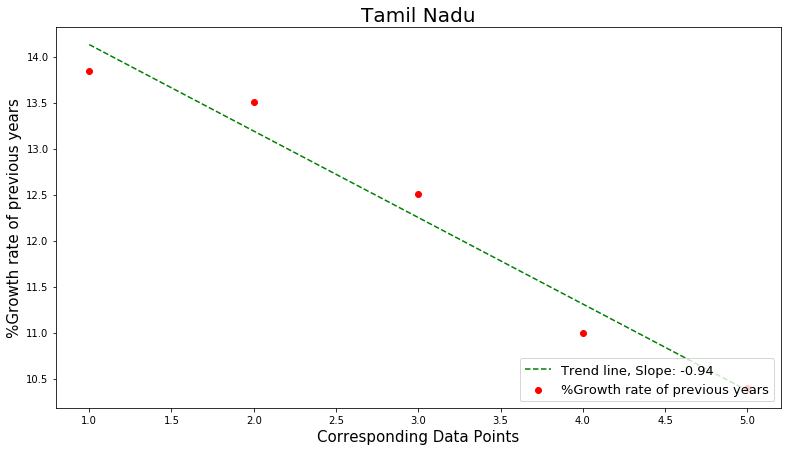

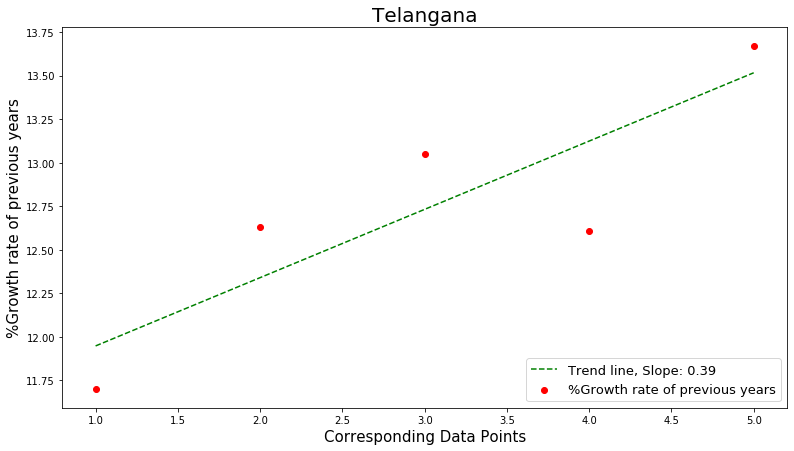

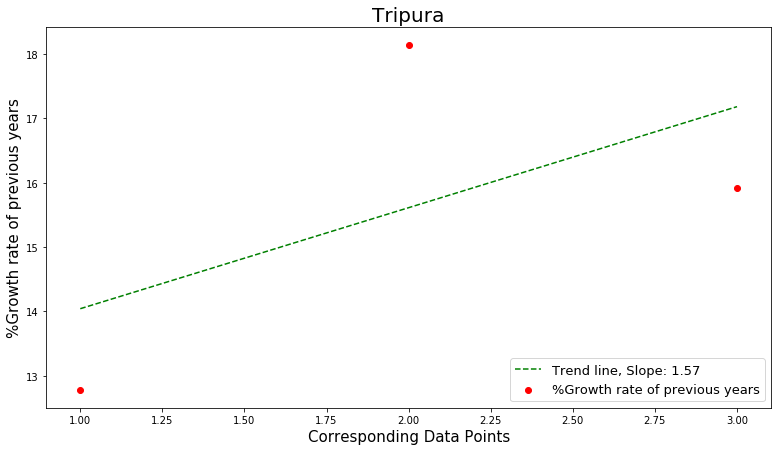

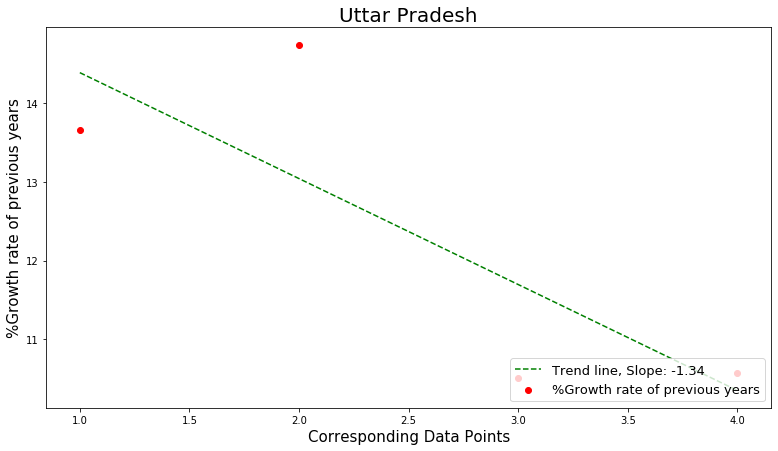

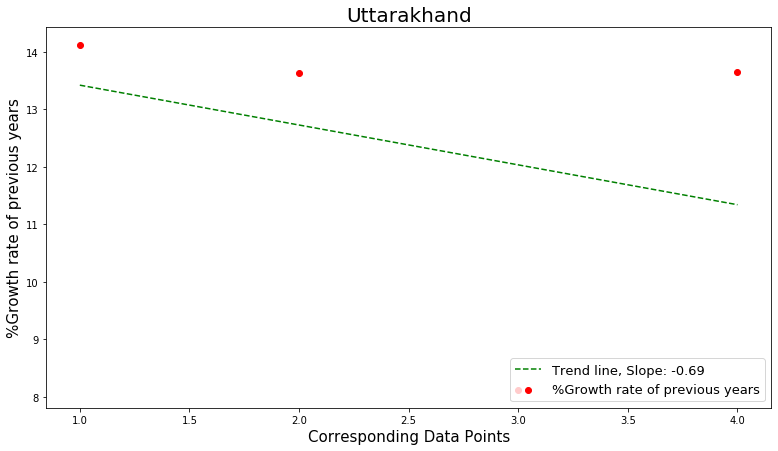

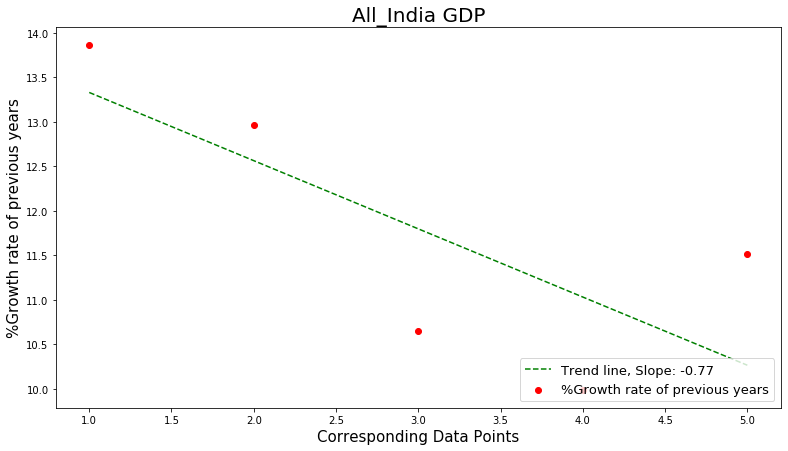

In [6]:
columns = list(task_1_1A.columns)
# store all columns in the dataframe into a variable for further process

# Loop over all the columns of the dataframe and plot the best fit line for each state
# (As each column is the name of one state)
for col in columns:
# Iterating over each column into the variable "col"

    y = task_1_1A[col].tolist()
    # Extracting the values of "col" from the dataframe and storing it into the variable "y"
    
    y = [i for i in y if math.isnan(i) == False]
    # Cleaning list (checking for any "nan" values and removing them for ploting the graph)

    x = list(range(1, len(y)+1))
    # "x" variable takes the values from 1 upto the length of the "y" variable
    
    if(len(y) != 0):
    # Check if the length of the column values is null then, skip ploting that column
    
        fig = plt.figure(figsize=(13,7))

        m, c = np.polyfit(x, y, 1)
        # Numpy's "polyfit" function is used to get the slope and intercept.
        # The third argument of polyfit function is degree, "1" representing linear equations
        
        y_ = [m*i+c for i in x]
        # Get the values of "y" based on slope and intercept gotten from the above line by using "Y = mX +c" 
        # Store the values in another variable "y_"

        plt.scatter(x, y,color='red')
        # Ploting a scatter plot for all the datapoints of "x" and "y"
        
        plt.plot(x, y_, '--', color='green')   
        # Plotting the trend line, y-axis would be the values calculated from "Y= mX + c" equation
        
        plt.xlabel('Corresponding Data Points', fontsize=15)
        # Labeling the x-axis, font size of the text can be given by adding "fontsize" argument
        
        plt.ylabel("%Growth rate of previous years", fontsize=15)
        # Labeling the y-axis, font size of the text can be given by adding "fontsize" argument

        plt.title(col, fontsize=20)
        # Giving an appropriate Title for the graph, font size of the text can be given by adding "fontsize" argument
    
        plt.legend(["Trend line, Slope: {}".format(round(m, 2)), "%Growth rate of previous years"], fontsize=13, loc='lower right', frameon=None)
        # Since there are two plots in a single graph, we need to add the legend so as to distinguish each plot
#         if col == "All_India GDP":
#             plt.savefig("All_india_gdp.png")
        
        plt.show()
        # End of one Iteration
        
# End of the For Loop


### Sub Task:

"% Growth over previous year" for all the states (not union territories)

In [7]:
task_1_1A = task_1_1A.T
# Transpose the dataframe that was used in the above sub task for Part-1 

task_1_1A['Average'] = task_1_1A.mean(axis=1)
# Add another column to the datafrme. Take the average of each state in the overall previous years

task_1_1A = task_1_1A[["Average"]]
# Remove all the columns except for the "Average" column.

task_1_1A = task_1_1A.sort_values(['Average'], ascending=False)
# sort the dataframe based on Average values (Either in Ascending or Descending order)
# In the above step, Sorted the dataframe in Descending order of Average values

index = list(task_1_1A.index)
# Getting all the indexes so as to plot the graph

task_1_sb_2 = pd.DataFrame(list(zip(list(task_1_1A["Average"]), index)), columns =["label", "index"])
# Creating a mini dataframe to plot the barplot using seaborn library easily

task_1_sb_2.head()
# Printing the first 5 rows of the prepared dataframe for further analysis of this task

################### Dataset preperation for Data-1A Task 1: Second Sub-Task is done #####################

,label,index
0,16.866667,Mizoram
1,15.953333,Nagaland
2,15.613333,Tripura
3,15.266000,Madhya Pradesh
4,14.230000,Karnataka


### Plotting the Graph for "% Growth for previous years" for each state

Text(0.5, 1.0, '% Growth over previous year')

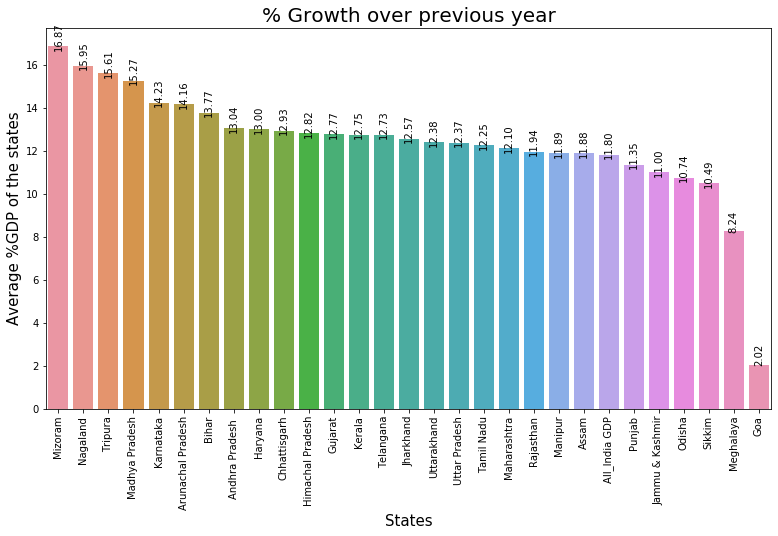

In [8]:
fig = plt.figure(figsize=(13,7))
# Setting the size of the graph for readibility of the graph

g = sns.barplot(x="index", y="label", data=task_1_sb_2)
# Using seaborn's barplot function passing column values as the arguments

plt.xlabel('States', fontsize=15)
# Setting the label for x-axis and setting the font size as well

plt.ylabel('Average %GDP of the states', fontsize=15)
# Setting the label for y-axis and setting the font size as well

g.set_xticklabels(labels=index, rotation=90)
# Setting the labels for each bar plot and rotating the text for the readibility of the labels

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=90)  

plt.title('% Growth over previous year', fontsize=20)
# plt.savefig("%Growth_previos_year.png")
# Setting the title to the graph along with the font size of the text

#### Reason for choosing the graph
Clearly the data is numerical and its easier to plot a bar graph against it and check how each state is performing against it.

### Questions


#### Q1). How will you compare the growth rates of any two states?
<B> Answer: </B> By considering the slopes of each graph and comparing their solpes, Among all the states we can say that Madhya Pradesh is growing better than any other states<br> <br>

#### Q2). Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.
<B> Answer: </B> 
The Top 3 Fastest growing states:
- Goa (slope -> 8.12)
- Manipur (slope -> 2.47)
- Tripura (slope -> 1.57)

The Top 3 Slowest growing states
- Maharashtra (slope -> -2.51)
- Nagaland (slope -> -2.09)
- Gujarat (slope -> -2.04)


#### Q3). What is the Nation's growth rate?

<B> Answer: </B>  Average Nation's Growth rate is 11.8%

#### Q4).What has been the growth rate of your home state, and how does it compare to the national growth rate?

<B> Answer: </B> My home state is Andra Pradesh, comparing my home state with All india GDP:
Andra Pradesh is comparitively growing at a faster pace than all india GDP.

-- Growth Rate of Andra Pradesh: 13.04% where as All India Growth Rate: 11.8%. Apart from that If we look at the trend line, Andra Pradesh's slope of the trend line is much greater than than of All India's slope of trend line. 

--Hence, we can say that Andra Pradesh is growing consistantly fast than the Overall India.


## Task-2:

<B> Problem Statement: </B> Plot the total GDP of the states for the year 2015-16:

### Dataset Prerperation for task

In [9]:
task_2_1A = data_1A[data_1A['Items  Description'] != '(% Growth over previous year)']
#  Dropping all the rows having "%Growth over previous years" as "GSDP -Current prices" needs to be plotted

task_2_1A = task_2_1A[task_2_1A['Duration'] == '2015-16']
# Filtering out only the rows with the Duration "2015-16" as asked in the question

task_2_1A.set_index("Duration", inplace=True)
# Setting the index of the dataframe with the Duration column

task_2_1A = task_2_1A.drop("Items  Description", axis=1).T.drop(["All_India GDP"])
# Dropping the columns Items Description as well as "All India GDP"(After transposing the dataframe)
# Drop "All India GDP" as well, according to the problem statement "Total GDP of the states" should be plotted

task_2_1A = task_2_1A.sort_values('2015-16', ascending=False)
# Sort the dataframe based on the year column in either ascending or descending order
# Abover line sorts the values in the descending order

task_2_1A = task_2_1A.reset_index()
# # Creating a mini dataframe to plot the barplot using seaborn library easily

index = list(task_2_1A["index"])
# # Getting all the indexes so as to plot the graph

task_2_1A.head()
# Printing the first 5 rows of the prepared dataframe for further analysis of this task

################### Dataset preperation for Data-1A for second part is done #####################

Duration,index,2015-16
0,Tamil Nadu,1212668.0
1,Uttar Pradesh,1153795.0
2,Karnataka,1027068.0
3,Gujarat,994316.0
4,Andhra Pradesh,609934.0


### Plotting the Graph for Total GSDP for the year 2015-16

Text(0.5, 1.0, 'Total GSDP for the year 2015-16')

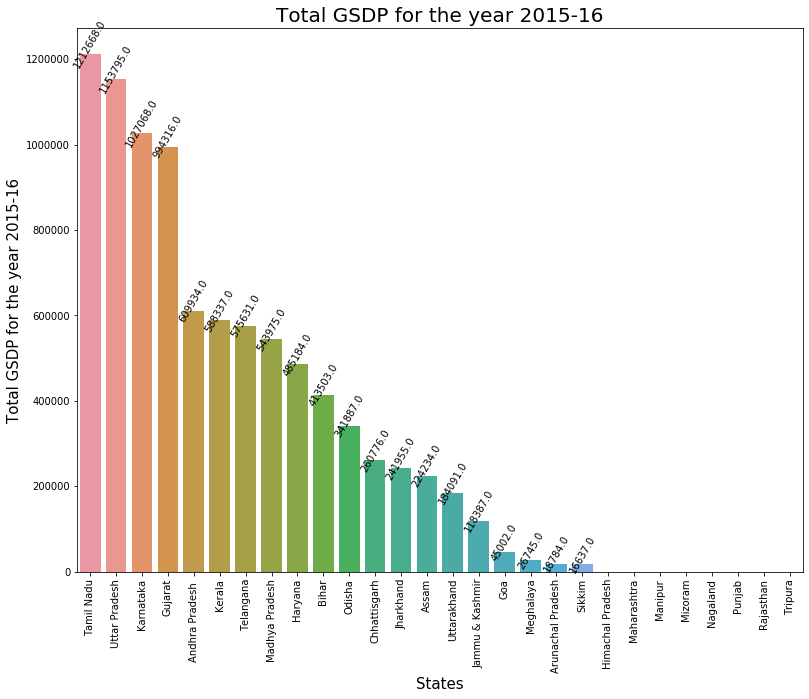

In [10]:
fig = plt.figure(figsize=(13,10))
# Setting the size of the graph for readibility of the graph

g = sns.barplot(x="index", y="2015-16", data=task_2_1A)
# Using seaborn's barplot function passing column values as the arguments

plt.xlabel('States', fontsize=15)
# Setting the label for x-axis and setting the font size as well

plt.ylabel('Total GSDP for the year 2015-16', fontsize=15)
# Setting the label for y-axis and setting the font size as well

g.set_xticklabels(labels=index, rotation=90)
# Setting the labels for each bar plot and rotating the text for the readibility of the labels

for p in g.patches:
    g.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=60)  

plt.title('Total GSDP for the year 2015-16', fontsize=20)
# plt.savefig("total_gsdp_2015-16.png")
# Setting the title to the graph along with the font size of the text

### Questions


#### Q1). Which Plot will you use for this? Why? (Remeber to plot the graph in a way such as it is easier to read and compare)
<B> Answer: </B> I will be using the Bar plot in the decreasing order

The data is numerical, and its easier to plot and get insights from bar plot for it.

#### Q2). Identify the top 5 and the bottom 5 states based on total GDP.
<B> Answer: </B> 
The top 5 states are: Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat, Andra Pradesh
The bottom 5 states are: Sikkim, Arunachan Pradesh, Meghalaya, Goa, Jammu & Kashmir

#### Q3). What insights can you draw from this graph? What states are performing poorly? (this will not be solely based on total GDP)
<B> Answer: </B> Among the data that is available, we observe that Sikkimm Arunachal pradesh, Meghalaya and Goa are few states which are performing very poorly. The Gross State Domestic Product is approximately around 45000 or less for these states in the year 2015-16.

## Part I-B:

-- For the analysis, use <b>Data I-B</b>. You can also <b>use Data I-B along with Data I-A if required</b>. Also, perform the analysis <b>only for the duration 2014-15. </b>

-- <b> Filter out the union territories </b> (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the central, not state governments.


### Data Extraction And Data Manipulation
All the data extraction is done in the begining itself, printing the dataframe

In [11]:
data_1B.head()
# Printing the first 5 rows of the data frame

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
States,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,1900863,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977
Sikkim,137447,1329,138776,550697,212499,82058,845253,70568,47347,21079,75330,119514,149265,483103,1467133,72200,18400,1520933,6330,240274
Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,25207,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718
Rajasthan,15044394,4069385,19113780,6552580,1122888,5353326,13028794,7297290,3814461,1827413,6451997,2460364,4164287,26015812,58158386,5394503,2333442,61219447,721610,84837
Chhattisgarh,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,739057,2462166,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860


In [12]:
data_1B_UT.head()
# In this Dataframe it has the data realated to union territories as well

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
States,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,1900863,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977
Sikkim,137447,1329,138776,550697,212499,82058,845253,70568,47347,21079,75330,119514,149265,483103,1467133,72200,18400,1520933,6330,240274
Arunachal Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,25207,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718
Rajasthan,15044394,4069385,19113780,6552580,1122888,5353326,13028794,7297290,3814461,1827413,6451997,2460364,4164287,26015812,58158386,5394503,2333442,61219447,721610,84837
Chhattisgarh,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,739057,2462166,867982,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860


## Task-1:

<B> Problem Statement: </B> Plot the GDP per capita for all the states.

### Data Preration for Task 1

In [13]:
task_1_1B = data_1B[["Per Capita GSDP (Rs.)"]].sort_values('Per Capita GSDP (Rs.)', ascending=False)

task_1_1B = task_1_1B.reset_index()
# # Creating a mini dataframe to plot the barplot using seaborn library easily

index = list(task_1_1B["States"])
# # Getting all the indexes so as to plot the graph

task_1_1B.head()
# Printing the first 5 rows of the prepared dataframe for further analysis of this task

################### Dataset preperation for Data-1B for first task is done #####################

Item,States,Per Capita GSDP (Rs.)
0,Goa,271793
1,Sikkim,240274
2,Haryana,164077
3,Kerala,154778
4,Uttarakhand,153076


### Plotting the Graph for Per Capita GSDP (Rs.)

Text(0.5, 1.0, 'Per Capita GSDP (Rs.) of all states')

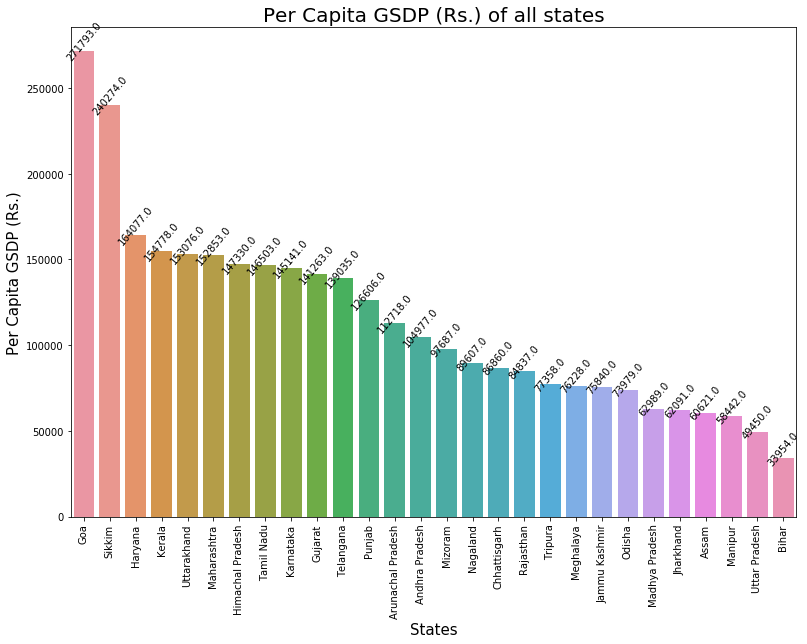

In [14]:
fig = plt.figure(figsize=(13,9))
# Setting the size of the graph for readibility of the graph

g = sns.barplot(x="States", y="Per Capita GSDP (Rs.)", data=task_1_1B)
# Using seaborn's barplot function passing column values as the arguments

plt.xlabel('States', fontsize=15)
# Setting the label for x-axis and setting the font size as well

plt.ylabel('Per Capita GSDP (Rs.)', fontsize=15)
# Setting the label for y-axis and setting the font size as well

g.set_xticklabels(labels=index, rotation=90)
# Setting the labels for each bar plot and rotating the text for the readibility of the labels

for p in g.patches:
    g.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
               va = 'center', xytext = (0, 10), textcoords = 'offset points', rotation=50)  

plt.title('Per Capita GSDP (Rs.) of all states', fontsize=20)
# plt.savefig("perCapita.png")
# Setting the title to the graph along with the font size of the text

In [15]:
# Findig the Ratio of Highest per Capita GDP to the Lowest per Capita GDP
ratio = max(task_1_1B["Per Capita GSDP (Rs.)"])/min(task_1_1B["Per Capita GSDP (Rs.)"])
print(ratio)
ratio1 = min(task_1_1B["Per Capita GSDP (Rs.)"])/max(task_1_1B["Per Capita GSDP (Rs.)"])
print(ratio1)

8.004741709371503
0.12492595467874448


### Questions

#### Q1). Identify the top 5 and the bottom 5 states based on the GDP per capita.
<B> Answer: </B> Based on the GDP per Capita for the year 2014-15:
Top 5 States: Goa, Sikkim, Haryana, Kerala, Uttarakhand
Bootom 5 States: Bihar, Uttar Pradesh, Manipur, Assam, Jharkhand

#### Q2). Find the ratio of the highest per capita GDP to the lowest per capita GDP.
<B> Answer: </B>
Higest Per Capita GDP to Lowest Per Capita GDP: <b>8.005</b> <br>
Lowest Per Capita GDP to Highest Per Capita GDP: <b> 0.125 </b>


## Task 2:

<B> Problem Statement </B> Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

### Data Preperation & Manipulation for Task 2

In [16]:
task_2_1B = data_1B[["Primary", "Secondary", "Tertiary","Per Capita GSDP (Rs.)", "Gross State Domestic Product"]].sort_values('Gross State Domestic Product', ascending=False)
# Create a new dataframe from the 2nd main dataframe. Including only specific columns.

task_2_1B["%Primary Contribution"] = (task_2_1B["Primary"]/task_2_1B["Gross State Domestic Product"])*100
task_2_1B["%Secondary Contribution"] = (task_2_1B["Secondary"]/task_2_1B["Gross State Domestic Product"])*100
task_2_1B["%Tertiary Contribution"] = (task_2_1B["Tertiary"]/task_2_1B["Gross State Domestic Product"])*100
# Computing %Contribution for each sector (Primary, Secondary and Tertiary) by dividing by the GSDP.

task_2_1B[["%Primary Contribution", "%Secondary Contribution", "%Tertiary Contribution"]] = task_2_1B[["%Primary Contribution", "%Secondary Contribution", "%Tertiary Contribution"]].astype(float).round(2)
# Rounding of the values to 2 decimal places so that it would be easy for ploting the graph

task_2_1B.head()
# Printing the first 5 rows of the dataframe

################### Dataset preperation for Data-1B for second task is done #####################

Item,Primary,Secondary,Tertiary,Per Capita GSDP (Rs.),Gross State Domestic Product,%Primary Contribution,%Secondary Contribution,%Tertiary Contribution
States,,,,,,,,
Maharashtra,21758383,47445207,88631076,152853,179212165,12.14,26.47,49.46
Tamil Nadu,13329774,32841892,53343788,146503,109256373,12.20,30.06,48.82
Uttar Pradesh,25999255,25548724,45968959,49450,104337115,24.92,24.49,44.06
Karnataka,12066304,20484404,50490630,145141,92178806,13.09,22.22,54.77
Gujarat,1.58872e+07,3.30235e+07,3.02204e+07,141263,8.95027e+07,17.75,36.90,33.76


### Graph1: Plotting the Graph for comparison of each Sector on the overall GDP od that particular State

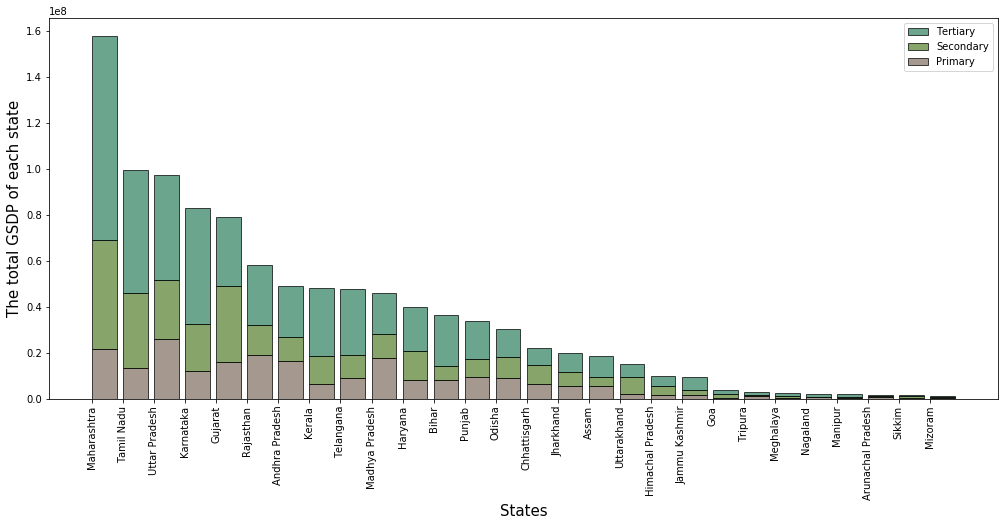

In [17]:
y1 = list(task_2_1B["Primary"])
y2 = list(task_2_1B["Secondary"])
y3 = list(task_2_1B["Tertiary"])
# Storing the %Contribution for each sector into a different list so that we can get stacked plot for each state

label = list(task_2_1B.index) 
# Getting the indexes that is the states that will be considered from the dataframe

index = np.arange(len(label))
# storing a list of integers from 0 till the length of indexes present
# so as to get the desired plot.

width = 0.8
# Width of each bar in the graph

fig=plt.figure(figsize=(17, 7), facecolor='w', edgecolor='k')
# Setting the size of the figure

# p_x = plt.bar(index, list(task_2_1B["Gross State Domestic Product"]), align='edge', width=width, color='c', edgecolor='white')

p1 = plt.bar(index, y1, align='edge', width=width, color='#7f6d5f', edgecolor='k', alpha=0.7)
# Defining the lowest part of the bar 

p2 = plt.bar(index, y2, align='edge', width=width, bottom=y1, color='#557f2d', edgecolor='k', alpha=0.7)
# Defining the middle part of the bar

p3 = plt.bar(index, y3, align='edge', width=width, bottom=np.array(y1)+np.array(y2), color='#2d7f5e', alpha=0.7, edgecolor='k')
# Defining the uppermost part of the bar

plt.xlabel('States', fontsize=15)
# Setting the label for x-axis and setting the font size as well

plt.ylabel('The total GSDP of each state', fontsize=15)
# Setting the label for y-axis and setting the font size as well

plt.xticks(index, label, rotation=90)
# Declaring and setting the labels for the x-axis of the graph

plt.legend((p3[0], p2[0], p1[0]), ('Tertiary', 'Secondary', 'Primary'))
# plt.savefig("sector_contri.png")
# Defining the legend for the Stacked plot

<b> Conclusions of the above graph </b>

The above graph states that 

- Of the total GDP of each state, we can see the contribution of all the three sectors.

- From it we can also say that contribution of Tertiary sector towards the overall GDP is comparitively higher than any other sectors in Every state.

### Graph2: Plotting the Graph for comparison of %Contrbution of each Sector

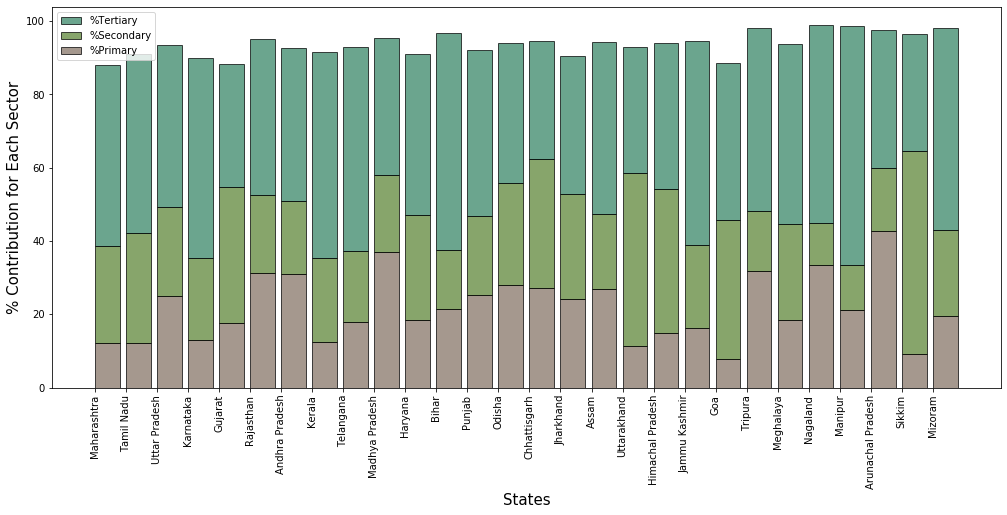

In [18]:
y1 = list(task_2_1B["%Primary Contribution"])
y2 = list(task_2_1B["%Secondary Contribution"])
y3 = list(task_2_1B["%Tertiary Contribution"])
# Storing the %Contribution for each sector into a different list so that we can get stacked plot for each state

label = list(task_2_1B.index) 
# Getting the indexes that is the states that will be considered from the dataframe

index = np.arange(len(label))
# storing a list of integers from 0 till the length of indexes present
# so as to get the desired plot.


width = 0.8
# Width of each bar in the graph

fig=plt.figure(figsize=(17, 7), facecolor='w', edgecolor='k')
# Setting the size of the figure

# p_x = plt.bar(index, list(task_2_1B["Gross State Domestic Product"]), align='edge', width=width, color='c', edgecolor='white')

p1 = plt.bar(index, y1, align='edge', width=width, color='#7f6d5f', edgecolor='k', alpha=0.7)
# Defining the lowest part of the bar 

p2 = plt.bar(index, y2, align='edge', width=width, bottom=y1, color='#557f2d', edgecolor='k', alpha=0.7)
# Defining the middle part of the bar

p3 = plt.bar(index, y3, align='edge', width=width, bottom=np.array(y1)+np.array(y2), color='#2d7f5e', alpha=0.7, edgecolor='k')
# Defining the uppermost part of the bar

plt.xlabel('States', fontsize=15)
# Setting the label for x-axis and setting the font size as well

plt.ylabel('% Contribution for Each Sector', fontsize=15)
# Setting the label for y-axis and setting the font size as well

plt.xticks(index, label, rotation=90)
# Declaring and setting the labels for the x-axis of the graph

plt.legend((p3[0], p2[0], p1[0]), ('%Tertiary', '%Secondary', '%Primary'))
# Defining the legend for the Stacked plot
# plt.savefig("percentge_secr_contr.png")

###### Refer https://www.w3resource.com/graphics/matplotlib/barchart/matplotlib-barchart-exercise-16.php
# For better annotation

<b> Reason for choosing the above graph </b>

Since we need to compare the percentage across various sectors for each state, We can club them up to form a stacked bar chart.
Stack each sector over the other, so that we can tell which state is lacking in which sector

<b> Conclusions of the above graph </b>

All from the Graph1 we did conclude that Tertiary sector was contributing the most in almost every sector but from the above Graph that is Graph2: 

- We can see that for States like Sikkim, Uttarakhand, Gujarat, the Seconday Sector has contributed towards the most to the GDP of their state.

- And for the States like Arunachal Pradesh, Primary Sector has contributed the most towards the GDP of their state.

In [19]:
task_2_1B['Percentile_rank']=task_2_1B["Per Capita GSDP (Rs.)"].rank(pct=True)
cortn = task_2_1B['Percentile_rank'].corr(task_2_1B['%Primary Contribution'])
print("The correlation between Percentile Rank and %Primary Contribution: {}".format(round(cortn, 2)))

The correlation between Percentile Rank and %Primary Contribution: -0.58


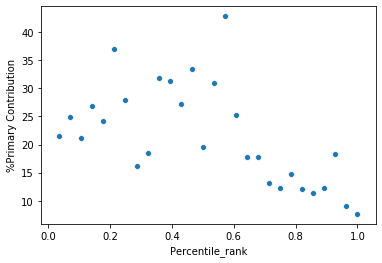

In [20]:
# The other way to conway the correlation is by scatter plot
ax = sns.scatterplot(x="Percentile_rank", y="%Primary Contribution", data=task_2_1B)
# Correlation plot between percentile rank and % Primary contribution
# plt.savefig("corr1.png")

#### Reason for the Choice of Graph:
Since correlation between two variables need to be shown, hence scatter plot conveys most of the information
We can even look at the trend of the points and give our conclusion

#### Conclusion for the above graph:
We observe that Percentile rank has a negative correlation with the %Primary Contribution


### Questions

#### Q1). Which plot will you use here? Why?
<B> Answer: </B> 

Statcked Bar Plot was used where: 

- the lowest bar represents the Primary Contrubution,

- The middle bar on to represents the Secondary Contribution

- the topmost bar represents the Tertiary Contribution


#### Q2). Why is (Primary + Secondary + Tertiary) not equal to total GDP?
<B> Answer: </B>

- Primary + Secondary + Teritiary = TOTAL GSVA at basic prices

- Gross State Domestic Product = TOTAL GSVA at basic prices + Taxes on Products - Subsidies on products

Hence, to calculate the total GDP of a state we need to add the taxes on each product and subtract the subsidary on the product which mostly is given by the central government. Hence it 
<b> The sum of all the three sectors is not equivalent to the total GDP of that State </b>

#### Q3). Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.
<B> Answer: </B>

We Observe that there is a negative correlation between the percentile rank of each state with the %Contribution of Primary Sector.

Which implies <b> As the Percentile Rank increases, the %Contribution of Primary decreases </b>

## Task 3:

<B> Problem Statement: </B> Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

Note: Categorisation into four groups will simplify the subsequent analysis, as otherwise, comparing the data of all the states would become quite exhaustive.


### Data Preperation & Manipulation for Task 3

In [21]:
task_3_1B = data_1B.drop(["Primary", "Secondary", "Tertiary"], axis=1)
# Consider the main dataframe for Part-1B, and just drop the sectors from the df

quantle_20 = task_3_1B["Per Capita GSDP (Rs.)"].quantile(.2)
quantle_50 = task_3_1B["Per Capita GSDP (Rs.)"].quantile(.5)
quantle_85 = task_3_1B["Per Capita GSDP (Rs.)"].quantile(.85)
quantle_1 = task_3_1B["Per Capita GSDP (Rs.)"].quantile(1)
# From the Dataframe obtained find 20th, 50th, 85th and 100th quantile of the Per Capita GSDP column
# And store in 4 different variables

task_3_1B["Category"] = ''
# Creating a new column "Category"

for i in range(0, len(task_2_1B)):
    if (task_3_1B["Per Capita GSDP (Rs.)"][i] > 0) and (task_3_1B["Per Capita GSDP (Rs.)"][i] < quantle_20):
        task_3_1B["Category"][i] = "C4"
    elif task_3_1B["Per Capita GSDP (Rs.)"][i] > quantle_20 and task_3_1B["Per Capita GSDP (Rs.)"][i] < quantle_50:
        task_3_1B["Category"][i] = "C3"
    elif task_3_1B["Per Capita GSDP (Rs.)"][i] > quantle_50 and task_3_1B["Per Capita GSDP (Rs.)"][i] < quantle_85:
        task_3_1B["Category"][i] = "C2"
    elif task_3_1B["Per Capita GSDP (Rs.)"][i] > quantle_85 and task_3_1B["Per Capita GSDP (Rs.)"][i] <= quantle_1:
        task_3_1B["Category"][i] = "C1"
# For each state allocate a categogy based on the quantile range.

task_3_1B.head()
# Print the top 5 rows of the dataframe

################### Dataset preperation for Data-1B for third & fourth task is done #####################

Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Category
States,,,,,,,,,,,,,,,,,,
Andhra Pradesh,14819416,1484300,4672266,1151729,4664889,4233400,5076984,1900863,4405409,2200897,4215389,48825542,5512100,1690800,52646842,501510,104977,C2
Sikkim,137447,1329,550697,212499,82058,70568,47347,21079,75330,119514,149265,1467133,72200,18400,1520933,6330,240274,C1
Arunachal Pradesh,686117,30842,26120,113527,147842,60421,35203,25207,48418,243867,218728,1636292,70099,30272,1676119,14870,112718,C2
Rajasthan,15044394,4069385,6552580,1122888,5353326,7297290,3814461,1827413,6451997,2460364,4164287,58158386,5394503,2333442,61219447,721610,84837,C3
Chhattisgarh,3948847,2451970,4370593,1198438,2669855,1535571,871770,739057,2462166,867982,1112232,22228481,2601791,1332092,23498180,270530,86860,C3


## Task 4
<b> Problem Statement-1: </b> For each category (C1, C2, C3, C4):
Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.

Note-II: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3 sub-sectors contribute to approximately 80% of the GDP". This is to simplify the analysis and make the results consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time; so, the analysis needs to be sharp and concise.)

<b> Problem Statement-2</b> Plot the contribution of the sub-sectors as a percentage of the GSDP of each category. 

## Category 1

### Dataset preperation for C1 Category

In [22]:
task_3_1B_C1 = pd.DataFrame(pd.DataFrame(task_3_1B.groupby("Category").sum()).drop(["Per Capita GSDP (Rs.)", "Subsidies on products", "TOTAL GSVA at basic prices", "Taxes on Products", "TOTAL GSVA at basic prices", "Population ('00)"], axis=1).loc["C1"])
# Creating a subset of the dataframe by using group by and fetching the details of Category 1 and storing it in a var

task_3_1B_C1.columns = ["Sum"]
# Renaming the columns of the new dataframe formed

GSDP_C1_sector = task_3_1B_C1.T["Gross State Domestic Product"]
# Fetching the GSDP for C1 category so that can be divided with other sub sectors

task_3_1B_C1["%Contribution_sub_sector"] = task_3_1B_C1["Sum"]/float(GSDP_C1_sector)
# Computing the % Contribution of the subsector by divding with the total GSDP

task_3_1B_C1 = task_3_1B_C1.sort_values("%Contribution_sub_sector", ascending=False).drop("Gross State Domestic Product")
# Sorting the values of % Contribution of the sub sector in the increasing order

task_3_1B_C1["Cumulative"] =  task_3_1B_C1['%Contribution_sub_sector'].cumsum()
# Calculating the cumulative summation of the subsector with cumsum method

task_3_1B_C1["to_plot_Cumulative"] = [x if x<0.8 else 0 for x in task_3_1B_C1["Cumulative"]]
task_3_1B_C1 = pd.DataFrame(task_3_1B_C1[task_3_1B_C1["to_plot_Cumulative"] != 0][["to_plot_Cumulative", "%Contribution_sub_sector"]])*100
# Filtering out the 80% of the GSDP for C1 category

task_3_1B_C1
# Printing out the dataframe created

,to_plot_Cumulative,%Contribution_sub_sector
Item,,
Manufacturing,16.613203,16.613203
"Agriculture, forestry and fishing",30.151965,13.538762
"Trade, repair, hotels and restaurants",43.474890,13.322925
"Real estate, ownership of dwelling & professional services",56.656687,13.181797
Construction,67.329055,10.672368
Other services,74.983684,7.654629


### Dataset preperation for C2 Category

In [23]:
task_3_1B_C2 = pd.DataFrame(pd.DataFrame(task_3_1B.groupby("Category").sum()).drop(["Per Capita GSDP (Rs.)", "Subsidies on products", "TOTAL GSVA at basic prices", "Taxes on Products", "TOTAL GSVA at basic prices", "Population ('00)"], axis=1).loc["C2"])
# Creating a subset of the dataframe by using group by and fetching the details of Category 1 and storing it in a var

task_3_1B_C2.columns = ["Sum"]
# Renaming the columns of the new dataframe formed

GSDP_C2_sector = task_3_1B_C2.T["Gross State Domestic Product"]
# Fetching the GSDP for C1 category so that can be divided with other sub sectors

task_3_1B_C2["%Contribution_sub_sector"] = task_3_1B_C2["Sum"]/float(GSDP_C2_sector)
# Computing the % Contribution of the subsector by divding with the total GSDP

task_3_1B_C2 = task_3_1B_C2.sort_values("%Contribution_sub_sector", ascending=False).drop("Gross State Domestic Product")
# Sorting the values of % Contribution of the sub sector in the increasing order

task_3_1B_C2["Cumulative"] =  task_3_1B_C2['%Contribution_sub_sector'].cumsum()
# Calculating the cumulative summation of the subsector with cumsum method

task_3_1B_C2["to_plot_Cumulative"] = [x if x<=0.8 else 0 for x in task_3_1B_C2["Cumulative"]]
task_3_1B_C2 = pd.DataFrame(task_3_1B_C2[task_3_1B_C2["to_plot_Cumulative"] != 0][["to_plot_Cumulative", "%Contribution_sub_sector"]])*100
# Filtering out the 80% of the GSDP for C1 category

task_3_1B_C2


,to_plot_Cumulative,%Contribution_sub_sector
Item,,
Manufacturing,17.340648,17.340648
"Real estate, ownership of dwelling & professional services",32.705312,15.364664
"Agriculture, forestry and fishing",46.902957,14.197645
"Trade, repair, hotels and restaurants",57.135168,10.232211
Construction,64.195812,7.060643
Other services,70.535695,6.339883
Financial services,76.606782,6.071087


### Dataset preperation for C3 Category

In [24]:
task_3_1B_C3 = pd.DataFrame(pd.DataFrame(task_3_1B.groupby("Category").sum()).drop(["Per Capita GSDP (Rs.)", "Subsidies on products", "TOTAL GSVA at basic prices", "Taxes on Products", "TOTAL GSVA at basic prices", "Population ('00)"], axis=1).loc["C3"])
# Creating a subset of the dataframe by using group by and fetching the details of Category 1 and storing it in a var

task_3_1B_C3.columns = ["Sum"]
# Renaming the columns of the new dataframe formed

GSDP_C3_sector = task_3_1B_C3.T["Gross State Domestic Product"]
# Fetching the GSDP for C1 category so that can be divided with other sub sectors

task_3_1B_C3["%Contribution_sub_sector"] = task_3_1B_C3["Sum"]/float(GSDP_C3_sector)
# Computing the % Contribution of the subsector by divding with the total GSDP

task_3_1B_C3 = task_3_1B_C3.sort_values("%Contribution_sub_sector", ascending=False).drop("Gross State Domestic Product")
# Sorting the values of % Contribution of the sub sector in the increasing order

task_3_1B_C3["Cumulative"] =  task_3_1B_C3['%Contribution_sub_sector'].cumsum()
# Calculating the cumulative summation of the subsector with cumsum method

task_3_1B_C3["to_plot_Cumulative"] = [x if x<=0.8 else 0 for x in task_3_1B_C3["Cumulative"]]
task_3_1B_C3 = pd.DataFrame(task_3_1B_C3[task_3_1B_C3["to_plot_Cumulative"] != 0][["to_plot_Cumulative", "%Contribution_sub_sector"]])*100
# Filtering out the 80% of the GSDP for C1 category

task_3_1B_C3
# Printing out the dataframe created

,to_plot_Cumulative,%Contribution_sub_sector
Item,,
"Agriculture, forestry and fishing",21.420049,21.420049
Manufacturing,34.909465,13.489416
"Trade, repair, hotels and restaurants",45.179738,10.270273
"Real estate, ownership of dwelling & professional services",54.901067,9.721330
Construction,63.639643,8.738575
Other services,70.692579,7.052936
Mining and quarrying,77.626011,6.933431


### Dataset preperation for C4 Category

In [25]:
task_3_1B_C4 = pd.DataFrame(pd.DataFrame(task_3_1B.groupby("Category").sum()).drop(["Per Capita GSDP (Rs.)", "Subsidies on products", "TOTAL GSVA at basic prices", "Taxes on Products", "TOTAL GSVA at basic prices", "Population ('00)"], axis=1).loc["C4"])
# Creating a subset of the dataframe by using group by and fetching the details of Category 1 and storing it in a var

task_3_1B_C4.columns = ["Sum"]
# Renaming the columns of the new dataframe formed

GSDP_C4_sector = task_3_1B_C4.T["Gross State Domestic Product"]
# Fetching the GSDP for C1 category so that can be divided with other sub sectors

task_3_1B_C4["%Contribution_sub_sector"] = task_3_1B_C4["Sum"]/float(GSDP_C4_sector)
# Computing the % Contribution of the subsector by divding with the total GSDP

task_3_1B_C4 = task_3_1B_C4.sort_values("%Contribution_sub_sector", ascending=False).drop("Gross State Domestic Product")
# Sorting the values of % Contribution of the sub sector in the increasing order

task_3_1B_C4["Cumulative"] =  task_3_1B_C4['%Contribution_sub_sector'].cumsum()
# Calculating the cumulative summation of the subsector with cumsum method

task_3_1B_C4["to_plot_Cumulative"] = [x if x<=0.8 else 0 for x in task_3_1B_C4["Cumulative"]]
task_3_1B_C4 = pd.DataFrame(task_3_1B_C4[task_3_1B_C4["to_plot_Cumulative"] != 0][["to_plot_Cumulative", "%Contribution_sub_sector"]])*100
# Filtering out the 80% of the GSDP for C1 category

task_3_1B_C4

,to_plot_Cumulative,%Contribution_sub_sector
Item,,
"Agriculture, forestry and fishing",24.323490,24.323490
"Trade, repair, hotels and restaurants",36.106707,11.783216
Manufacturing,46.819166,10.712459
"Real estate, ownership of dwelling & professional services",57.184576,10.365410
Construction,66.949097,9.764521
"Transport, storage, communication & services related to broadcasting",73.890858,6.941761


### Sub Task1: 3/4/5 SubSectors for each category:

<b> C1 Category: </b>
- 3rd top Sub Sector: Trade, Repair, Hotels and Restaurents
- 4th top Sub Sector: Real Estate ownership
- 5th top Sub Sector: Construction

<b> C2 Category: </b>
- 3rd top Sub Sector: Agriculture, Forestery and Fishing
- 4th top Sub Sector: Trade, Repair, Hotels and Restaurents
- 5th top Sub Sector: Construction


<b> C3 Category: </b>
- 3rd top Sub Sector: Trade, Repair, Hotels and Restaurents
- 4th top Sub Sector: Real Estate ownership
- 5th top Sub Sector: Construction


<b> C4 Category: </b>
- 3rd top Sub Sector: Manufacturing
- 4th top Sub Sector: Real Estate ownership
- 5th top Sub Sector: Construction


### Sub Task2: Plotting the graph for C1-C4 Categories

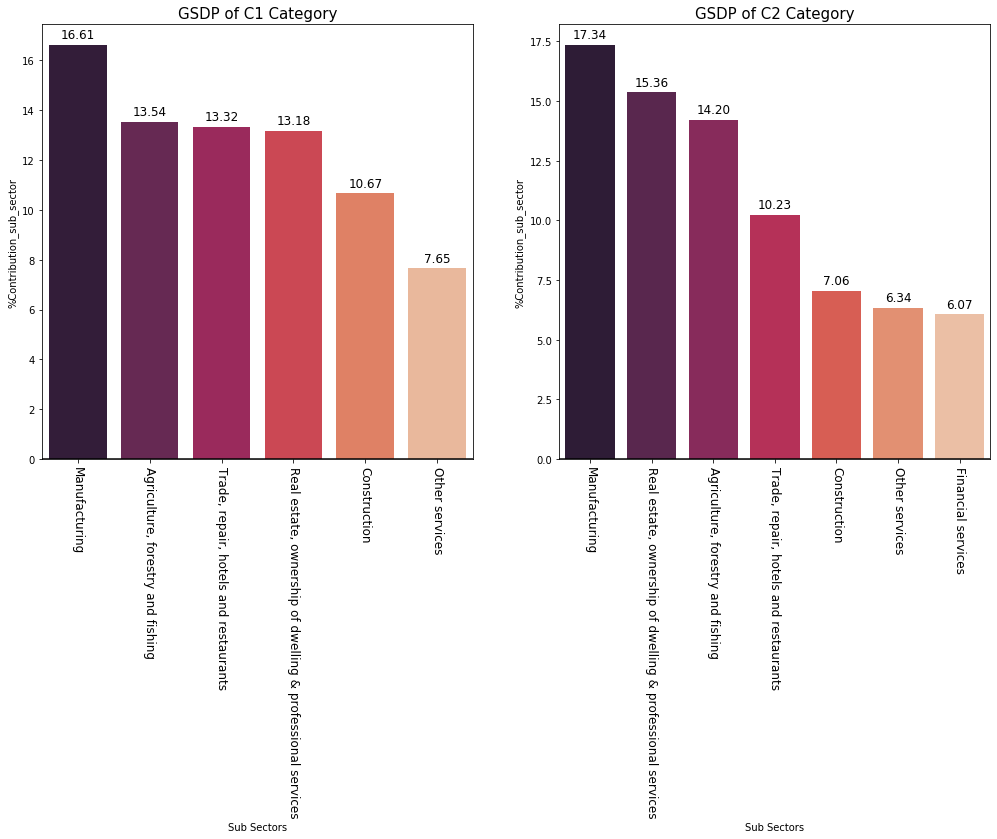

In [26]:

fig, ax = plt.subplots(1, 2, figsize=(17, 8))

# Category C1 and C2
list_catges = [task_3_1B_C1, task_3_1B_C2]
i = 0 
for df in list_catges:
    label_C1 = list(df.index)
    index_C1 = np.arange(len(label_C1))
    g = sns.barplot(x=index_C1, y="%Contribution_sub_sector", ax=ax[i], data=df, palette="rocket")
    ax[i].axhline(0, color="k")

    ax[i].set(xlabel='Sub Sectors')
    # Setting the X-axis label

    ax[i].set_xticklabels(labels=label_C1, fontsize=12, rotation=-90)
    # Setting the labels for each bar plot and rotating the text for the readibility of the labels

    for p in g.patches:
        g.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)  

    ax[i].set_title('GSDP of C{} Category'.format(i+1), fontsize=15)
    # Setting the title to the graph along with the font size of the text
    i = i+1
# plt.savefig("C1_C2.png")


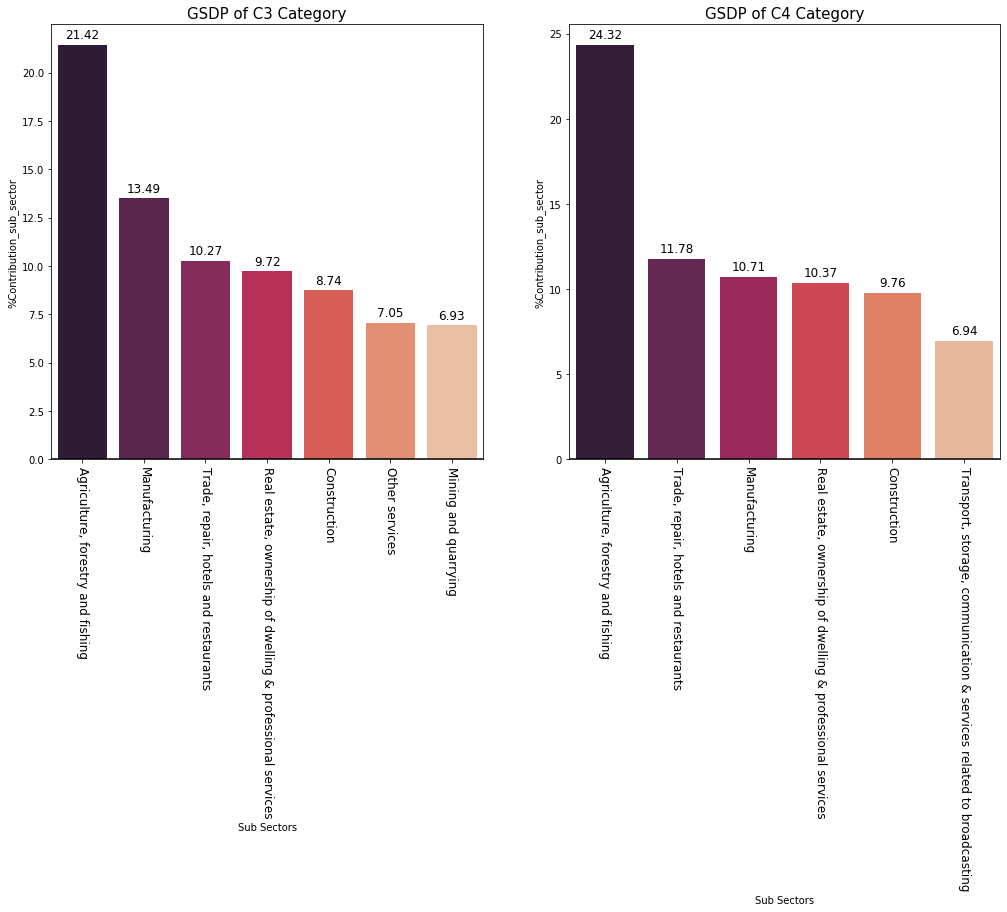

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))

# Category C3 and C4
list_catges = [task_3_1B_C3, task_3_1B_C4]
i = 0 
for df in list_catges:
    label_C1 = list(df.index)
    index_C1 = np.arange(len(label_C1))
    g = sns.barplot(x=index_C1, y="%Contribution_sub_sector", ax=ax[i], data=df, palette="rocket")
    ax[i].axhline(0, color="k")

    ax[i].set(xlabel='Sub Sectors')

    ax[i].set_xticklabels(labels=label_C1, fontsize=12, rotation=-90)
    # Setting the labels for each bar plot and rotating the text for the readibility of the labels

    for p in g.patches:
        g.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)  

    ax[i].set_title('GSDP of C{} Category'.format(i+3), fontsize=15)
    # Setting the title to the graph along with the font size of the text
    i = i+1
# plt.savefig("C3_C4.png")

#### Reason for the Choice of Graph:
After %Contribution per sub graph is calculated and arranged such that the total percentage combines to 80% 
It is easy to view the data in the bar chart, and compare between various Categories and sub sectors

           GDP Category
0  1.18129e+08       C1
1  6.22829e+08       C2
2   1.3536e+08       C3
3  2.33252e+08       C4


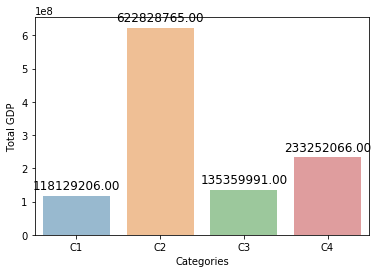

In [28]:
# How does the GDP distribution of the top states (C1) differ from the others?
list_ = [float(GSDP_C1_sector), float(GSDP_C2_sector), float(GSDP_C3_sector), float(GSDP_C4_sector)]
catrs = ["C1", "C2", "C3", "C4"]
temp_df = pd.DataFrame([list_, catrs]).T
temp_df.columns = ["GDP", "Category"]
print(temp_df)

y_pos = np.arange(len(catrs))

g = sns.barplot(x="Category", y="GDP", data=temp_df, alpha=0.5)
# plt.xticks(y_pos, catrs)
plt.xlabel("Categories")
plt.ylabel("Total GDP")
for p in g.patches:
        g.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)  

# plt.savefig("Category_wise GSDP.png")
plt.show()

#### Reason for the Choice of Graph:
We just have to compare the first category's Total GDP with other Categories, this can be best done using Bar plot


### Questions:


Now that you have summarised the data in the form of plots, tables, etc., try to draw non-obvious insights from it. Think about questions such as:


#### Q1). How does the GDP distribution of the top states (C1) differ from the others?

<B> Answer: </B> 

From the above graph we can say that C1 Category has the lowest GDP distribution as compared to any other Category. On the Other hand C2 Category has the highest GDP distribution.

#### Q2). Which sub-sectors seem to be correlated with high GDP?

<B> Answer: </B>

- For C1 Category: Manufacturing

- For C2 Category: Manufacturing

- For C3 Category: Agriculture, Forestery and Fishing

- For C4 Category: Agriculture Forestery and Fishing


#### Q3). Which sub-sectors do the various categories need to focus on? 

<B> Answer: </B> 

According to the Sub sectors which contribute to 80% of the GSDP, there are some subsectors that need most focus on:
- For C1 Category: Other Services

- For C2 Category: Financial Services

- For C3 Category: Mining and Quarying

- For C4 Category: Transport Storage Communications & services related to bradcasting

## Part-II: GDP and Education Dropout Rates

### Data Extraction and Preperation

In [29]:
# Data Extraction of the Main Dataframe for this part is done in the beginning, pring to see the data
data_2 = pd.read_csv(path+"/rs_session243_au570_1.1.csv")

data_2.head()
# Print the top 5 rows of the dataframe

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [30]:
data_2 = data_2[["Level of Education - State", "Primary - 2014-2015", "Upper Primary - 2014-2015", "Secondary - 2014-2015"]]
# this data along with data-1B

data_2["Level of Education - State"] = data_2["Level of Education - State"].str.replace("A & N Islands", "Andaman Nicobar Islands")
data_2["Level of Education - State"] = data_2["Level of Education - State"].str.replace("Chhatisgarh", "Chhattisgarh")
data_2["Level of Education - State"] = data_2["Level of Education - State"].str.replace("Jammu and Kashmir", "Jammu Kashmir")
data_2["Level of Education - State"] = data_2["Level of Education - State"].str.replace("Uttrakhand", "Uttarakhand")
# Cleaning the States so that it can be merged with data-1B dataframe

data_2 = data_2.merge(data_1B_UT, left_on='Level of Education - State', right_on='States', how="left")
# Merge the datasets with first part B so as to obtain the complete dataset

data_2 = data_2.set_index("Level of Education - State").drop("All India")
# Set the index and drop the All India row

data_2.head()
# Print the top 5 rows of the dataframe

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
Level of Education - State,,,,,,,,,,,,,,,,,,,,,
Andaman Nicobar Islands,1.21,1.69,9.87,76670,18738,95409,6650,30607,69302,106559,...,45499,97359,90292,372538,574506,11504,13916,572094,4120,138858
Andhra Pradesh,4.35,5.20,15.71,14819416,1484300,16303716,4672266,1151729,4664889,10488884,...,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977
Arunachal Pradesh,10.89,6.71,17.11,686117,30842,716959,26120,113527,147842,287489,...,48418,243867,218728,631844,1636292,70099,30272,1676119,14870,112718
Assam,7.44,10.51,27.06,3855548,1471149,5326697,2002936,296587,1733568,4033091,...,1412466,1373611,1795658,9307109,18666897,1725309,582406,19809800,326780,60621
Bihar,2.09,4.08,25.90,7951890,68107,8019997,2189965,345168,3449763,5984896,...,3740641,2078171,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954


### Task1: 

<b> Problem Statement: </b> Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.



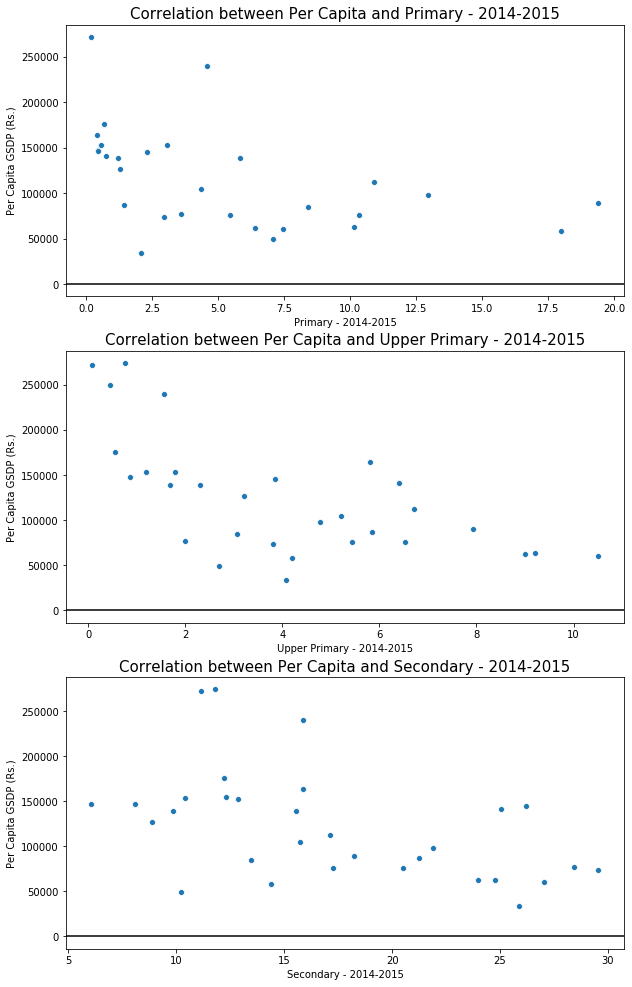

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(10, 17))

list_catges = ["Primary - 2014-2015", "Upper Primary - 2014-2015", "Secondary - 2014-2015"]
i = 0 
for col in list_catges:
    label_C1 = list(data_2[col].index)
    index_C1 = np.arange(len(label_C1))
    g = sns.scatterplot(x=col, y="Per Capita GSDP (Rs.)", ax=ax[i], data=data_2, palette="rocket")
    ax[i].axhline(0, color="k")

    ax[i].set(xlabel=col)

    for p in g.patches:
        g.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)  

    ax[i].set_title('Correlation between Per Capita and {}'.format(col), fontsize=15)
    # Setting the title to the graph along with the font size of the text
    i = i+1
    
# plt.savefig("corrtn.png")

#### Reason for the Choice of Graph:
Since correlation between two variables need to be shown, hence scatter plot conveys most of the information
We can even look at the trend of the points and give our conclusion


### Task2:
<b>Problem Statement: </b> Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

#### Data Preperation for the task

In [32]:
data_2["%Primary Contribution"] = (data_2["Primary"]/data_2["Gross State Domestic Product"])*100
data_2["%Secondary Contribution"] = (data_2["Secondary"]/data_2["Gross State Domestic Product"])*100
data_2["%Tertiary Contribution"] = (data_2["Tertiary"]/data_2["Gross State Domestic Product"])*100
# Computing %Contribution for each sector (Primary, Secondary and Tertiary) by dividing by the GSDP.

data_2[["%Primary Contribution", "%Secondary Contribution", "%Tertiary Contribution"]] = data_2[["%Primary Contribution", "%Secondary Contribution", "%Tertiary Contribution"]].astype(float).round(2)


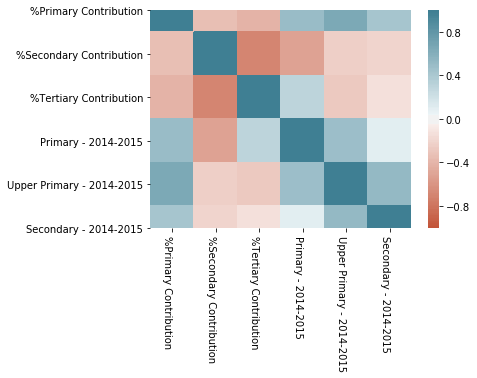

In [33]:
data_1_2 = data_2[["%Primary Contribution", "%Secondary Contribution", "%Tertiary Contribution", 
                   "Primary - 2014-2015", "Upper Primary - 2014-2015", "Secondary - 2014-2015"]]

corr = data_1_2.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
# Plotting the heatmap that can best show the correlation between each of these variables

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=-90,
    horizontalalignment='right'
);
# plt.savefig("cor.png")

#### Reason for the Choice of Graph:
Since correlation between more than two variables need to be shown, hence heat map conveys most of the information
We can even look at the correlation between two columns in a very simple manner


### Task3:
<b> Problem Statement: </b> You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?


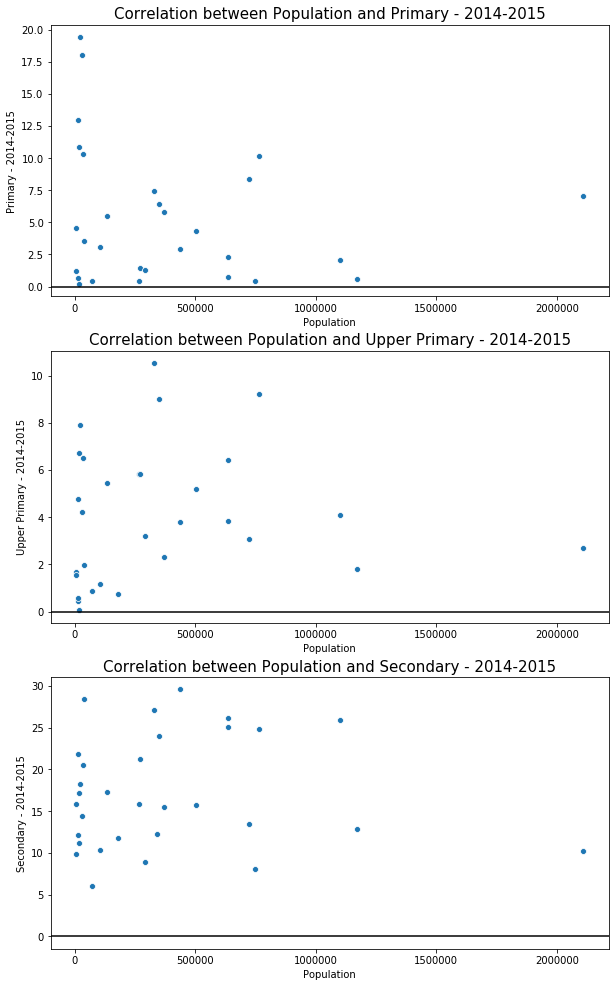

In [34]:
data_2 = data_2.sort_values("Population ('00)", ascending=True)
fig, ax = plt.subplots(3, 1, figsize=(10, 17))

list_catges = ["Primary - 2014-2015", "Upper Primary - 2014-2015", "Secondary - 2014-2015"]
i = 0 
for col in list_catges:
    label_C1 = list(data_2[col].index)
    index_C1 = np.arange(len(label_C1))
    g = sns.scatterplot(x="Population ('00)", y=col, ax=ax[i], data=data_2, palette="rocket")
    ax[i].axhline(0, color="k")

    ax[i].set(xlabel="Population")

    for p in g.patches:
        g.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)  

    ax[i].set_title('Correlation between Population and {}'.format(col), fontsize=15)
    # Setting the title to the graph along with the font size of the text
    i = i+1
    
# plt.savefig("corrtnPop.png")

#### Reason for the Choice of Graph:
Since correlation between two variables need to be shown, hence scatter plot conveys most of the information
We can even look at the trend of the points and give our conclusion

#### Conclusion for the above graph:
- There is no correlation that can be drawn between Population of each state and the dropout rate

### Hypothesis

We say that if certain changes are made towards improving the GDP for every state, we can see that our country's overall development would increase to the greatest heights.

Even the overall education if it increases then there would be a vast improvement in the country's GDP. And the Economic value of our country would hereby increase.